In [1]:
import pandas as pd
import numpy as np
import random as rn
import matplotlib.pyplot as plt

In [48]:
X=[]
for i in range(1000):
    X.append(np.random.randint(0,1000,2))
X = np.array(X)

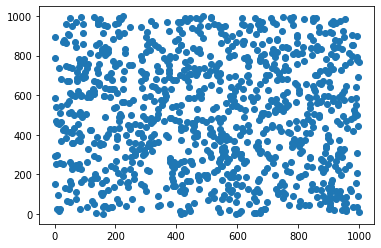

In [49]:
plt.scatter(X[:,0],X[:,1])

# k-means

In [50]:
def distance(x, y):
    d=0
    for i in range(len(x)):
        d+=(x[i]-y[i])**2
    d=np.sqrt(d)
    return (d)

In [51]:
def calMean(X, C):
    n=len(C)
    s=[0]*len(X[0])
    for i in range(n):
        for j in range(len(X[0])):
            s[j]+=X[C[i],j]
    for j in range(len(X[0])):
        s[j]/=n
    return (s)

In [52]:
def initialSeed(X, k):
    Sel = []
    n = len(X)
    a = rn.choice(X)
    Sel.append(a)
    dis = np.zeros(n)
    for i in range(k-1):
        for i in range(n):
            dis[i] += distance(X[i], a)
        m = np.argmax(dis)
        a = X[m]
        Sel.append(a)
    Sel = np.array(Sel)
    return Sel

In [53]:
def kMeans(X, k, iter = 100):
    M = initialSeed(X, k)
    for lp in range(iter):
        C = []
        for i in range(k):
            C.append([])
        for i in range(len(X)):
            minidx = 0
            mindist = 999999
            for j in range(k):
                d = distance(X[i],M[j])
                if(d < mindist):
                    minidx = j
                    mindist = d
            C[minidx].append(i)
        for i in range(k):
            if(len(C[i]) != 0):
                M[i] = calMean(X, C[i])
        temp = C
    return (C)

In [54]:
res = kMeans(X, 4)

In [55]:
#res

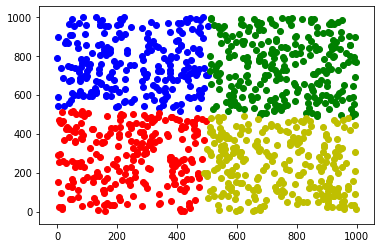

In [56]:
import matplotlib.pyplot as plt
color = ['b','g','r','y','c','k','m']
fig = plt.figure()
ax  = fig.add_subplot(111)
for i in range(len(res)):
    lst = []
    col = color[i]
    for j in range(len(res[i])):
        lst.append(X[res[i][j]])
    lst = pd.DataFrame(lst)
    ax.scatter(lst[0],lst[1],c=col)
plt.show()

[[782 956]
 [ 15  14]
 [998  12]
 [ 50 989]]


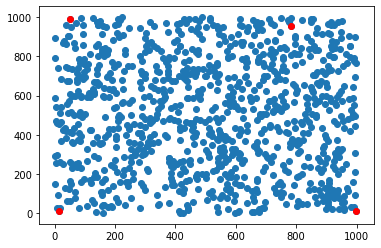

In [57]:
M = initialSeed(X, 4)
print(M)
plt.scatter(X[:,0],X[:,1])
plt.scatter(M[:,0],M[:,1], c='R')